In [26]:
import pandas
df = pandas.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/iris/iris.data',
    header=None,
)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
import numpy
targets = df.iloc[0:100, 4].values
targets = numpy.where(targets == 'Iris-setosa', -1, 1)
targets[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [28]:
samples = df.iloc[0:100, [0, 2]].values
samples.shape

(100, 2)

In [29]:
samples[:10]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5]])

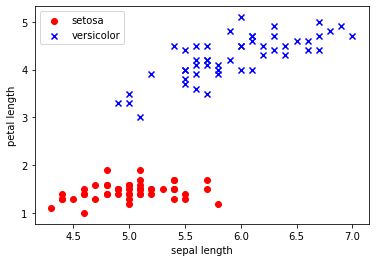

In [30]:
import matplotlib.pyplot as plt
plt.scatter(
    samples[:50, 0], samples[:50, 1],
    color='red', marker='o', label='setosa'
)
plt.scatter(
    samples[50:100, 0], samples[50:100, 1],
    color='blue', marker='x', label='versicolor'
)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [31]:
from perceptron import Perceptron
p = Perceptron(learning_rate=0.1, max_iterations=10)
p.train(samples, targets)
p.errors

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

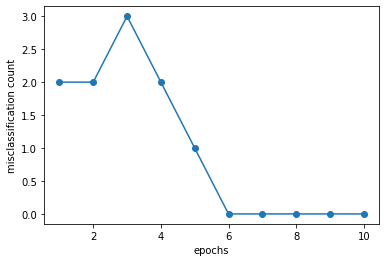

In [32]:
plt.plot(
    range(1, len(p.errors) + 1),
    p.errors,
    marker='o',
)
plt.xlabel('epochs')
plt.ylabel('misclassification count')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


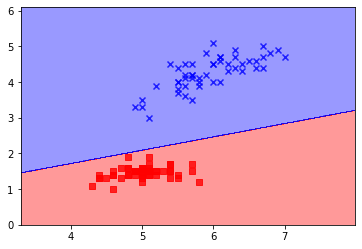

In [33]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(samples, targets, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    color_count = len(numpy.unique(targets))
    c_map = ListedColormap(colors[:color_count])
    sample_extent = [
        (samples[:, dim].min() - 1, samples[:, dim].max() + 1)
        for dim in (0, 1)
    ]
    grid = numpy.meshgrid(
        numpy.arange(*sample_extent[0], resolution),
        numpy.arange(*sample_extent[1], resolution),
    )
    predictions = classifier.predict(
        numpy.array([
            grid[0].ravel(),
            grid[1].ravel()
        ]).T
    )
    predictions = predictions.reshape(grid[0].shape)

    plt.contourf(
        grid[0],
        grid[1],
        predictions,
        alpha=0.4,
        cmap=c_map
    )
    plt.xlim(grid[0].min(), grid[0].max())
    plt.ylim(grid[1].min(), grid[1].max())
    for idx, target in enumerate(numpy.unique(targets)):
        plt.scatter(
            x=samples[targets == target, 0],
            y=samples[targets == target, 1],
            c=c_map(idx),
            alpha=0.8,
            marker=markers[idx],
            label=target
        )
plot_decision_regions(samples, targets, p, resolution=0.01)
plt.show()

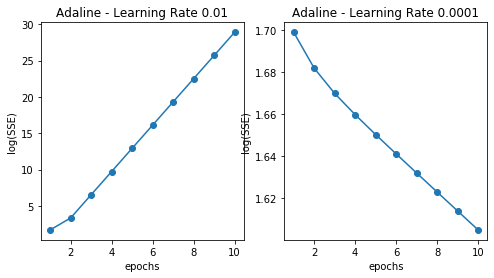

In [34]:
from adanline import Adaline
ada = Adaline()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada.train(samples, targets,
          training_iterations=10,
          training_speed=0.01)
ax[0].plot(
    range(1, len(ada.costs) + 1),
    numpy.log10(ada.costs),
    marker='o'
)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('Adaline - Learning Rate 0.01')

ada.train(samples, targets,
          training_iterations=10,
          training_speed=0.0001)
ax[1].plot(
    range(1, len(ada.costs) + 1),
    numpy.log10(ada.costs),
    marker='o'
)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('log(SSE)')
ax[1].set_title('Adaline - Learning Rate 0.0001')

plt.show()

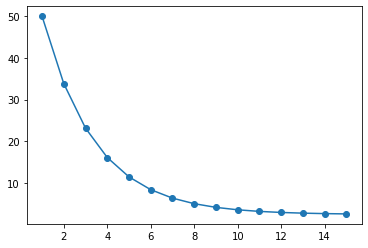

In [35]:
samples_standardized = numpy.copy(samples)
dim = (samples[:, 0], samples[:, 1])
for d in (0, 1):
    samples_standardized[:, d] = (dim[d] - dim[d].mean()) / dim[d].std()
ada.train(samples_standardized, targets,
          training_iterations=15,
          training_speed=0.01)
plt.plot(
    range(1, len(ada.costs) + 1),
    ada.costs,
    marker='o'
)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


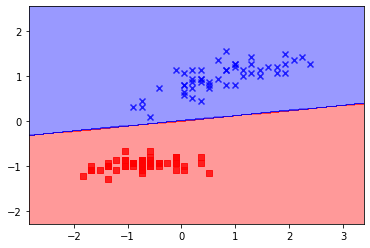

In [36]:
plot_decision_regions(samples_standardized, targets, ada)
plt.show()

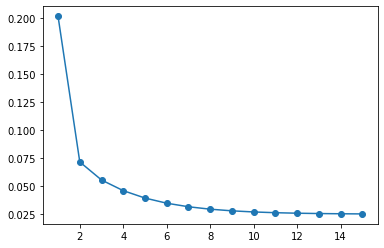

In [38]:
from adaline import AdalineSingleGradientDescent
ada = AdalineSingleGradientDescent()
ada.train(samples_standardized, targets,
          training_speed=0.01,
          training_iterations=15)
plt.plot(
    range(1, len(ada.costs) + 1),
    ada.costs,
    marker='o'
)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'petal length (standardized)')

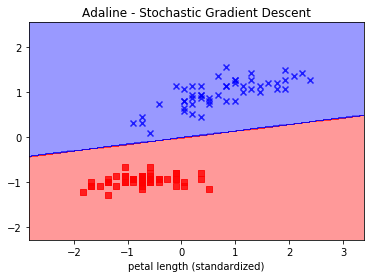

In [39]:
plot_decision_regions(samples_standardized, targets,
                      classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length (standardized)')
plt.xlabel('petal length (standardized)')